# General Binning function

In [360]:
import pandas as pd 
import numpy as np 
from astropy import table
from scipy import stats
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
import time
from scipy.interpolate import interp1d


start = time.time()


##In angstroms
resolution = 20


def bin_spectra(spectrum, resolution):
    
    lam = spectrum[:,0]
    flux = spectrum[:,1]
   
    number_of_bins = np.math.floor((lam[-1]-lam[0]) / resolution )
    
    #Binning
    flux_bin, bin_edge, index = scipy.stats.binned_statistic(lam, flux, statistic='mean', bins = number_of_bins)
    #print(flux_bin)
    #Takes the mean of the edges of the bin in order to plot the binned spectrum
    bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
    #print(bin_wavelength)
    
    #Make a table with the     
    bin_spectra = table.Table()
    flux_bin   = np.array(flux_bin)
    flux_bin = flux_bin/(median(flux_bin))
    bin_spectra['lam_bin'] = bin_wavelength
    bin_spectra['bin_flux'] = flux_bin
    
   
    bin_wavelength = np.array(bin_wavelength)
    #flux_bin   = np.array(flux_bin)
    #flux_bin = flux_bin/(median(flux_bin))
    #print(flux_bin)
    #print(flux_bin)
    #print(lam)
    #flux_bin   = np.array(flux_bin)
    return bin_spectra

end = time.time()
#print(end - start)

spectrum = np.loadtxt("sne/Ia/sn1989b.m05.dat")
result = bin_spectra(spectrum,20)
print(result)


     lam_bin             bin_flux     
------------------ -------------------
1948.4127516778524  0.1850870513043726
1968.4382550335572 0.29899888586519446
1988.4637583892618  0.9909202111328747
2008.4892617449666  0.7743698448403513
2028.5147651006712  0.7623181481656173
 2048.540268456376  0.2507606605288477
2068.5657718120806  0.2328025744839751
 2088.591275167785  0.5200206511006992
  2108.61677852349   0.576072462088935
 2128.642281879195  0.3173253776687194
               ...                 ...
 7695.732214765101 0.41947002975239683
 7715.757718120806  0.4351853361391127
 7735.783221476511    0.44579916491181
 7755.808724832215   0.453985958740406
7775.8342281879195 0.45218347896331196
 7795.859731543625  0.4625029821466951
  7815.88523489933 0.46096968894452106
 7835.910738255034  0.4485648920721131
 7855.936241610739  0.4488895835996057
 7875.961744966444  0.4251953158300249
 7895.987248322148  0.4139171314139725
Length = 298 rows


/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


# Bins and combines SN + HG

In [310]:
import numpy as np 
from astropy import table
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from scipy import *


SN = np.loadtxt("sne/Ia/sn1989b.m05.dat")
lams = SN[:,0]
fluxs = SN[:,1]

#In angstroms
resolution = 20
#print('the spectra is binned for a resolution of', resolution)

number_of_bins = np.math.floor((lams[-1]-lams[0]) / resolution ) 
flux_bin_SN, bin_edge, index = scipy.stats.binned_statistic(lams, fluxs, statistic='mean', bins = number_of_bins)

#Takes the mean of the edges of the bin in order to plot the binned spectrum
bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]


#Make a table with the     
bin_spectra = table.Table()
bin_spectra['lam_bin_SN'] = bin_wavelength
bin_spectra['bin_flux_SN'] = flux_bin_SN

bin_wavelength = np.array(bin_wavelength)
flux_bin_SN   = np.array(flux_bin_SN)

   
#print(bin_spectra)


GT = np.loadtxt("/Users/user/Desktop/ssf/gal/Sb")
lamgt = GT[:,0]
fluxgt = GT[:,1]


number_of_binsHG = np.math.floor((lamgt[-1]-lamgt[0]) / resolution ) 
flux_bin_HG, bin_edge, index = scipy.stats.binned_statistic(lamgt, fluxgt, statistic='mean', bins = number_of_bins)
#
bin_wavelengthHG = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]

#print(bin_spectra_HG)
#
bin_spectra_HG = table.Table()
bin_spectra_HG['lam_bin_HG'] = bin_wavelengthHG
bin_spectra_HG['flux_bin_HG'] = flux_bin_HG

#print(flux_bin_HG)

bin_wavelengthHG = np.array(bin_wavelengthHG)

#print(bin_wavelengthHG)

flux_bin_HG    = np.array(flux_bin_HG)

#print(flux_bin_HG)
#Combining spectra

lam = bin_wavelength
#flux= flux_bin_SN + flux_bin_HG

#print(mean(flux_bin_HG))

## Plot

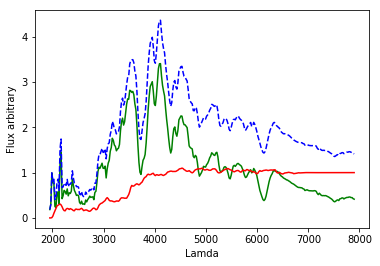

In [311]:
#Plot the data

# I am picking lam = 1 at the median
flux_bin_SN = flux_bin_SN/(median(flux_bin_SN))
flux_bin_HG = flux_bin_HG/(median(flux_bin_HG))

#print('HG:')
#print(flux_bin_HG)
##print(mean(flux_bin_SN))

flux = flux_bin_HG + flux_bin_SN

plt.plot(lam, flux_bin_SN,'g')
plt.plot(lam, flux_bin_HG, 'r')
plt.plot(lam, flux, 'b--')

plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.show()

#print(mean(flux_bin_SN))

#print(flux_bin_HG)

## Interpolate

In [312]:
SN_interp  = interpolate.interp1d(lam, flux_bin_SN,  bounds_error=False, fill_value=np.nan)
HG_interp = interpolate.interp1d(lam, flux_bin_HG,  bounds_error=False, fill_value=np.nan)

# Make into a file

In [313]:
#I need to fix this such that it'll save the lam with the spectra
np.savetxt("/Users/user/Desktop/ssf/superfit/fluxBINNEEDDD.dat",[lam,flux_bin_HG])
    

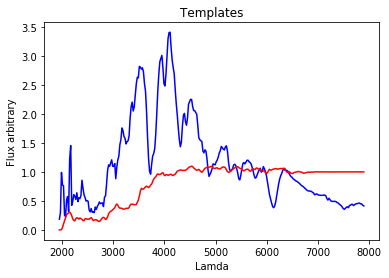

In [314]:
#fuck

plt.plot(lam, SN_interp(lam),'b')
plt.plot(lam, HG_interp(lam),'r')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()



In [315]:
#Reading Spectra
import glob


templates_gal = glob.glob('gal/**/*')
templates_gal = [x for x in templates_gal if 'CVS' not in x and 'README' not in x]
templates_gal = np.array(templates_gal)

templates_sn = glob.glob('sne/**/*')
templates_sn = [x for x in templates_sn if 'CVS' not in x and 'README' not in x]
templates_sn = np.array(templates_sn)

print(templates_gal)

['gal/pegase/spec_E.dat' 'gal/pegase/spec_Sbc.dat'
 'gal/pegase/spec_Sb.dat' 'gal/pegase/spec_Im.dat'
 'gal/pegase/spec_Sc.dat' 'gal/pegase/spec_Sa.dat'
 'gal/pegase/spec_Sd.dat' 'gal/pegase/spec_S0.dat'
 'gal/pegase/spec_Sc.norm.dat' 'gal/kinney/Sc-smoothed.dat'
 'gal/kinney/S0-unsmoothed.dat' 'gal/kinney/Sc-unsmoothed.dat'
 'gal/kinney/SB2-unsmoothed.dat' 'gal/kinney/E-unsmoothed.dat'
 'gal/kinney/SB5-unsmoothed.dat' 'gal/kinney/SB4-unsmoothed.dat'
 'gal/kinney/Sb-unsmoothed.dat' 'gal/kinney/SB3-unsmoothed.dat'
 'gal/kinney/SB1-unsmoothed.dat' 'gal/kinney/SB6-unsmoothed.dat'
 'gal/kinney/Sa-unsmoothed.dat' 'gal/poggianti/Sb_bianca'
 'gal/poggianti/S0_bianca' 'gal/poggianti/SB2_bianca'
 'gal/poggianti/Sd_bianca' 'gal/poggianti/El_bianca'
 'gal/poggianti/SB1_bianca' 'gal/poggianti/Sc_bianca'
 'gal/poggianti/Sa_bianca' 'gal/rest/Sb' 'gal/rest/Sc'
 'gal/rest/sdssquasarhead.asc' 'gal/rest/SB3' 'gal/rest/SB4'
 'gal/rest/gal.list' 'gal/rest/SB5' 'gal/rest/SB2' 'gal/rest/Sa'
 'gal/rest/S0' '

In [361]:
from astropy import table
import numpy as np 
from astropy import table
from scipy import stats
import scipy

resolution = 20
for i in templates_sn:
    
    spectrum=np.loadtxt(i)
    print(i)
    result = bin_spectra(spectrum,resolution)
    np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/{0}".format(i) ,result)    
    


sne/II/sn2005db.p86.dat
sne/II/sn1997cy.u31.dat
sne/II/sn2005cs.p14.dat
sne/II/sn1987a.m84.dat
sne/II/sn2004et.p47.dat
sne/II/sn2005cs.p01.dat
sne/II/sn2008ax.p35.dat
sne/II/sn1986I.p50.dat
sne/II/sn2004et.p45.dat
sne/II/sn1999em.p15.dat
sne/II/sn2005cs.p02.dat
sne/II/sn2005cp.u201.dat
sne/II/sn2005cs.p33.dat~
sne/II/theory99em.p15.dat
sne/II/theory99em.45.dat
sne/II/theory99em.p05.dat
sne/II/sn1980K.p41.dat
sne/II/sn2005cs.p06.dat
sne/II/sn1993j.p60.dat
sne/II/sn1979C.p43.dat
sne/II/sn1993W.p99.dat
sne/II/sn1999em.p04.dat


/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


sne/II/sn2005cl.p70.dat
sne/II/sn1986I.p83.dat
sne/II/theory99em.p10.dat
sne/II/sn2005db.p40.dat
sne/II/sn2004et.p323.dat
sne/II/sn2005cs.p05.dat
sne/II/sn2005cs.p11.dat
sne/II/sn1987a.max.dat
sne/II/sn2004et.p95.dat
sne/II/sn2005bx.p11.dat
sne/II/sn1988A.p03.dat
sne/II/sn1999em.p75.dat
sne/II/sn1986I.p19.dat
sne/II/sn2005cl.p15.dat
sne/II/sn1987a.p113.dat
sne/II/sn2004et.p391.dat
sne/II/sn2004et.p384.dat
sne/II/sn2005cs.p59.dat
sne/II/sn2004et.p169.dat
sne/II/sn1993j.p17.dat
sne/II/sn1993W.p04.dat
sne/II/sn1993j.p02.dat
sne/II/sn2005cs.p58.dat
sne/II/sn1993j.p116.dat
sne/II/sn1998S.m13.dat
sne/II/sn1979C.p07.dat
sne/II/sn1984E.p59.dat
sne/II/sn2005cp.u53.dat
sne/II/theory99em.p40.dat
sne/II/sn2004et.p367.dat
sne/II/sn1980K.p12.dat
sne/II/sn2005cs.p41.dat
sne/II/sn1998S.p02.dat
sne/II/sn1993W.p21.dat
sne/II/sn2005cp.u79.dat
sne/II/sn2002bj.p02.dat
sne/II/sn1979C.p11.dat
sne/II/sn1980K.p07.dat
sne/II/sn2005db.p15.dat
sne/II/sn2004et.p160.dat
sne/II/sn2005cs.max.dat
sne/II/sn2005cp.u125.

ValueError: Wrong number of columns at line 2

# Combined SN and HG

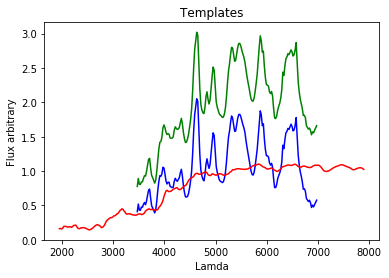

298


In [368]:

sn = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/sne/Ia/sn1989b.p17.dat")
hg = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/gal/Sb")

sn_interp = interpolate.interp1d(sn[:,0],sn[:,1], bounds_error=False, fill_value=np.nan)
hg_interp = interpolate.interp1d(hg[:,0],hg[:,1], bounds_error=False, fill_value=np.nan)

combined_spectra = sn_interp(lam) + hg_interp(lam)

plt.plot(lam, sn_interp(lam),'b')
plt.plot(lam, hg_interp(lam),'r')
plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()

np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/COMBINED.dat",[lam,combined_spectra])
print(len(hg_interp(lam)))


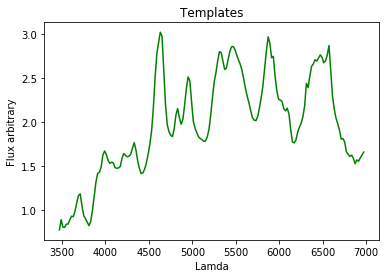

298


In [369]:
hg = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/COMBINED.dat")
lamhg=hg[:,0]
fluxhg=hg[:,1]

plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()

print(len(combined_spectra))
